# Practica 1

## Parte A

### Ejercicio 1:

In [74]:
# Cargar el fichero "titanic.csv" usando pandas
import pandas as pd
df = pd.read_csv("titanic.csv")
print(df)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [75]:
# Eliminar valores nulos y/o duplicados
df = df.dropna()
df = df.drop_duplicates()

# Resetear los indices
df = df.reset_index(drop=True)
print(df)

     PassengerId  Survived  Pclass  \
0              2         1       1   
1              4         1       1   
2              7         0       1   
3             11         1       3   
4             12         1       1   
..           ...       ...     ...   
178          872         1       1   
179          873         0       1   
180          880         1       1   
181          888         1       1   
182          890         1       1   

                                                  Name     Sex   Age  SibSp  \
0    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
1         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
2                              McCarthy, Mr. Timothy J    male  54.0      0   
3                      Sandstrom, Miss. Marguerite Rut  female   4.0      1   
4                             Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ... 

Al completar los pasos del ejercicio 1, vemos que han borrado 891 - 183 = **708 filas**.

Su eliminación es importante por los siguientes razones:

1. Las filas con valores NULL no contienen bastante informacion util para usarlas en el entrenamiento o validacion de un modelo de AA. Si intentaremos usarlas para estos escenarios, algunos de los atributos importantes para el entrenamiento van a faltar y al final podemos obtener un modelo con errores.
2. Los duplicados tampoco son utiles, porque no agregan ningun valor a los datos (ya sabemos que la fila con estos datos existe y no lo necesitamos decir otra vez).

### Ejercicio 2:

Los atributos que probablemente no seran utiles son:

1. **PassengerId** - el numero del pasajero no nos dice ninguna informacion sobre las calidades de persona que viajaba en el barco;
2. **Name** - el nombre del pasajero tampoco contiene caracteristicas del pasajero, que tienen alguna relacion con capacidad de supervivencia del dicho pasajero;
3. **Ticket** - el numero de boleto no nos dice ninguna informacion sobre las calidades de persona que viajaba en el barco;
4. **Cabin** - la cabina no nos da mucha informacion de la locacion potencial de un pasajero en el momento de disastre. Por esto, no es muy util en las prediccion.

In [76]:
# Definir los atributos para remover
atributos_no_necesarios = ['PassengerId', 'Name', 'Ticket', 'Cabin']

# y tambien los atributos numericos y categoricos
atributos_numericos = ['Age', 'SibSp', 'Parch', 'Fare']
atributos_categoricos = ['Survived', 'Pclass', 'Sex', 'Embarked']

# Eliminar columnas no necesarias
df = df.drop(columns=atributos_no_necesarios)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.0,1,0,71.2833,C
1,1,1,female,35.0,1,0,53.1000,S
2,0,1,male,54.0,0,0,51.8625,S
3,1,3,female,4.0,1,1,16.7000,S
4,1,1,female,58.0,0,0,26.5500,S


### Ejercicio 3:

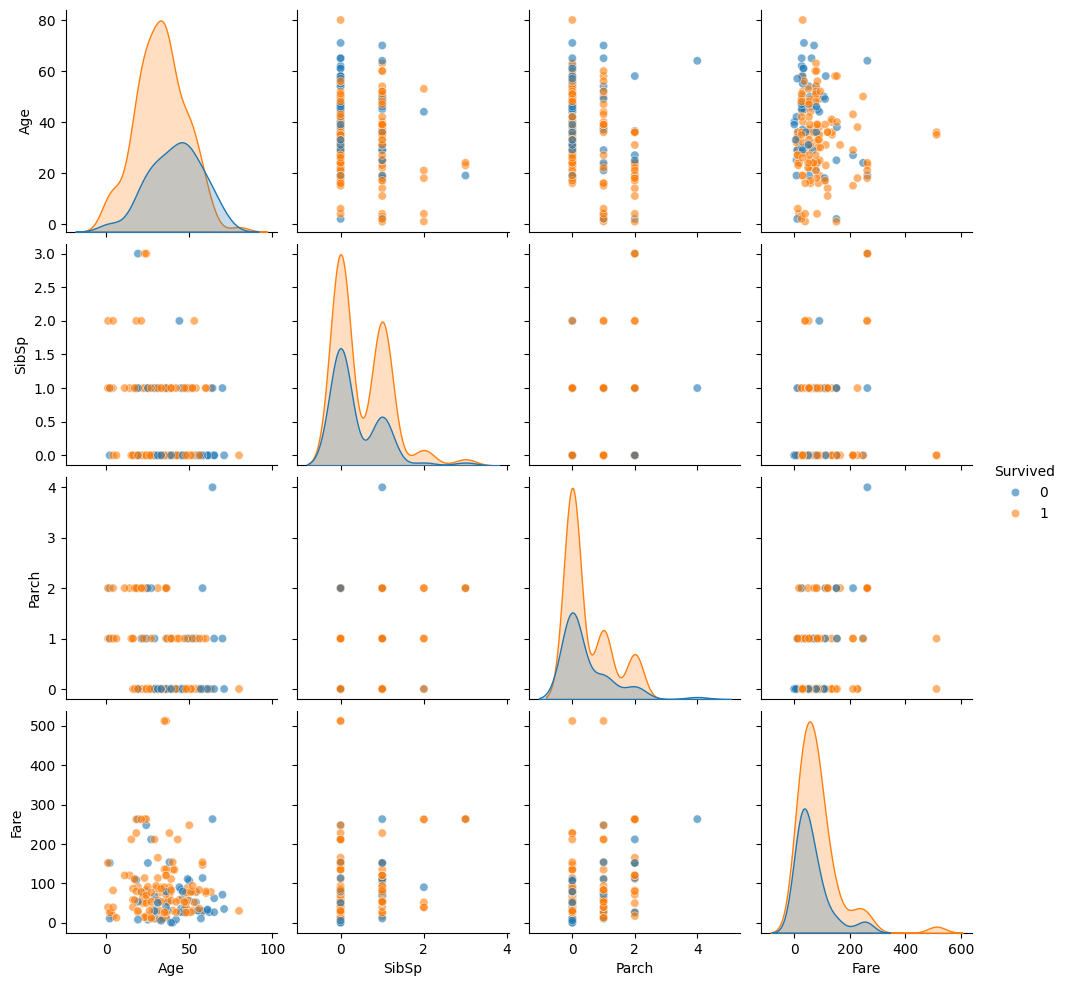

In [77]:
# Dibujar diagramas de dispersion
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(
    df[atributos_numericos + ['Survived']],
    hue='Survived',
    kind='scatter',
    plot_kws={'alpha': 0.6},
)

plt.show()

Estos scatter plots nos puede ayudar no solo comparar diferentes atributos en pares (e.g. Age vs Fare, Age vs SibSp/Parch, Fare vs SibSp/Parch), sino tambien nos muestran patrones relacionados con sobreviviencia de pasajeros.

            Age     SibSp     Parch      Fare
Age    1.000000 -0.156162 -0.271271 -0.092424
SibSp -0.156162  1.000000  0.255346  0.286433
Parch -0.271271  0.255346  1.000000  0.389740
Fare  -0.092424  0.286433  0.389740  1.000000


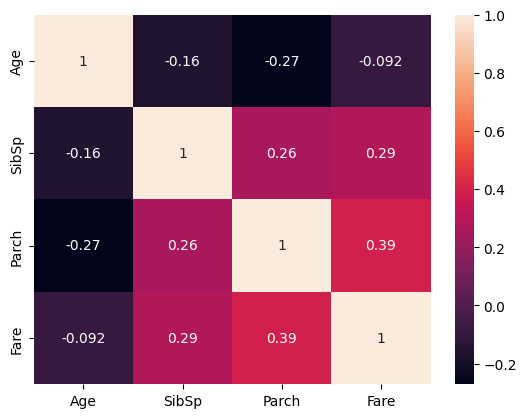

In [78]:
# Calcular coeficientes de correlacion y dibujar la diagrama
correlation_matrix = df[atributos_numericos].corr(method='pearson')
print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True)
plt.show()

La interpretacion de tabla de corelaciones (con las diagramas de dispersion) nos muestra lo siguiente:

- Fare tiene corelacion positiva con Parch y SibSp (pasajeros que viajaron con familia pagaron mas).
- Age tiene corelacion negativa con Pclass y Survived (personas mayores tenian menos probabilidad de sobrevivir y pasajeros de alta clase eran mayores).

Tambien, otras relaciones que nos pueden interesar:

- Correlacion negativa entre Pclass y Fare (pasajeros en Pclass=1 pagan mas que los en Pclass=3);  
- Correlacion inversa entre Survived y Pclass (pasajeros en Pclass=1 tienen la probabilidad mas alta de sobrevivir que los en Pclass=3);
- Correlacion positiva entre Survived y Fare (pasajeros que pagan mas por el viaje tienen la probabilidad mas alta de sobrevivir que los que pagan menos, y esta relacionado tambiem con Pclass).

### Ejercicio 4:

Para hacer calculaciones para atributos numericos, preparamos un dataset en que removemos los atributos categoricos.

In [79]:
# Descripcion general de numericos
numerical_stats = df[atributos_numericos].describe()
print(numerical_stats)

              Age       SibSp       Parch        Fare
count  183.000000  183.000000  183.000000  183.000000
mean    35.674426    0.464481    0.475410   78.682469
std     15.643866    0.644159    0.754617   76.347843
min      0.920000    0.000000    0.000000    0.000000
25%     24.000000    0.000000    0.000000   29.700000
50%     36.000000    0.000000    0.000000   57.000000
75%     47.500000    1.000000    1.000000   90.000000
max     80.000000    3.000000    4.000000  512.329200


Interpretando estos datos generales, podemos ver que:
- Media es util para encontrar la tendencia general de los datos, pero es sensitiva a outliers. Ejemplo en nuestro caso: edad media del pasajero.
- Desviacion tipica - mide cuánto se desvían los datos de la media.

In [80]:
# Calcular mediana
median = df[atributos_numericos].median()
print(median)

Age      36.0
SibSp     0.0
Parch     0.0
Fare     57.0
dtype: float64


En caso de mediana, por ejemplo, aqui podemos ver que la mitad de pasajeros pagaron $57 por su viaje o mas o la mitad de pasajeros eran 36 o mayor.

In [81]:
# Calcular moda
mode = df[atributos_numericos].mode()
print(mode)

    Age  SibSp  Parch   Fare
0  36.0      0      0  26.55


La moda muestra el elemento de datos que aparece mas veces en el dataset. En estos datos, podemos ver que la edad de pasajeros mas comun es 36

In [82]:
# Calcular varianza
variance = df[atributos_numericos].var()
print(variance)

Age       244.730542
SibSp       0.414940
Parch       0.569447
Fare     5828.993085
dtype: float64


Varianza es el desviacion tipica al cuadrado. Muestra como varian los datos.

In [83]:
# Calcular asimetria - mide la asimetría de la distribución
skewness = df[atributos_numericos].skew()
print(skewness)

Age      0.009676
SibSp    1.443019
Parch    1.519305
Fare     2.715883
dtype: float64


In [84]:
# Calcular curtosis
kurtosis = df[atributos_numericos].kurtosis()
print(kurtosis)

Age      -0.226184
SibSp     2.481957
Parch     1.986777
Fare     10.750636
dtype: float64


Curtosis mide qué tan "puntiaguda" es la distribución

In [85]:
# Calcular covarianza
cov = df[atributos_numericos].cov()
print(cov)

              Age      SibSp      Parch         Fare
Age    244.730542  -1.573661  -3.202391  -110.388782
SibSp   -1.573661   0.414940   0.124122    14.086806
Parch   -3.202391   0.124122   0.569447    22.454213
Fare  -110.388782  14.086806  22.454213  5828.993085


Covarianza mide como dos variables se mueven juntas. No tiene un rango como la correlacion


### Ejercicio 5:

Aqui dibujamos las diagramas utiles para ver trends en el dataset de Titanic.

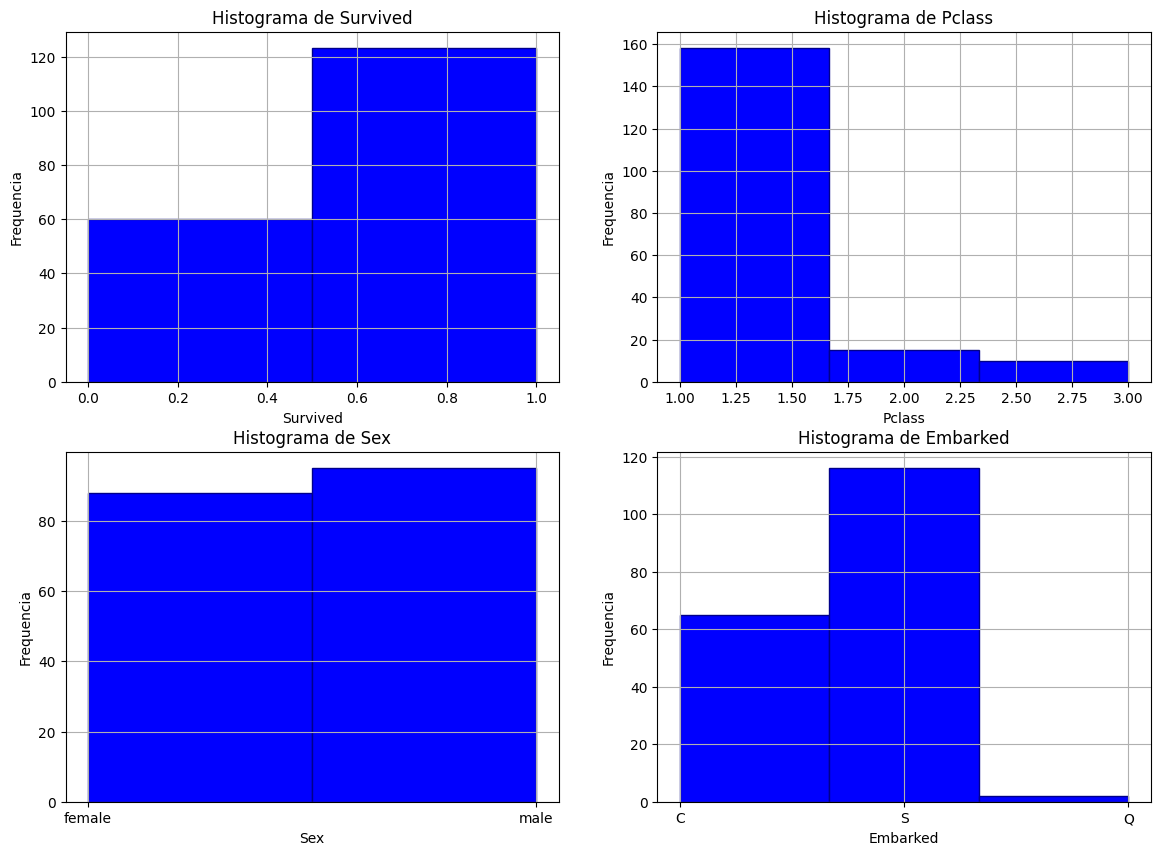

In [86]:
# Dibuja histograma de valores categoricos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# para cada uno de los atributos
for i, col in enumerate(atributos_categoricos):
    df[col].hist(ax=axes[i], bins=len(df[col].unique()), color='blue', edgecolor='darkblue')
    axes[i].set_title(f'Histograma de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequencia')

plt.show()

Estas histogramas nos muestran que:
- Survived tiene **2 valores** y distribucion imbalanceada con menos personas que sobrevivieron;
- Pclass tiene **3 valores** tambien no esta balanceada, con mas pasajeros de primera clase;
- Sex tiene **2 valores** y hay mas hombres que mujeres. Son +- balanceados;
- Embarked tiene **3 valores** La mayoria de personas embarcaron en ciudad 'S', que en ciudad 'C' y 'Q' juntas.

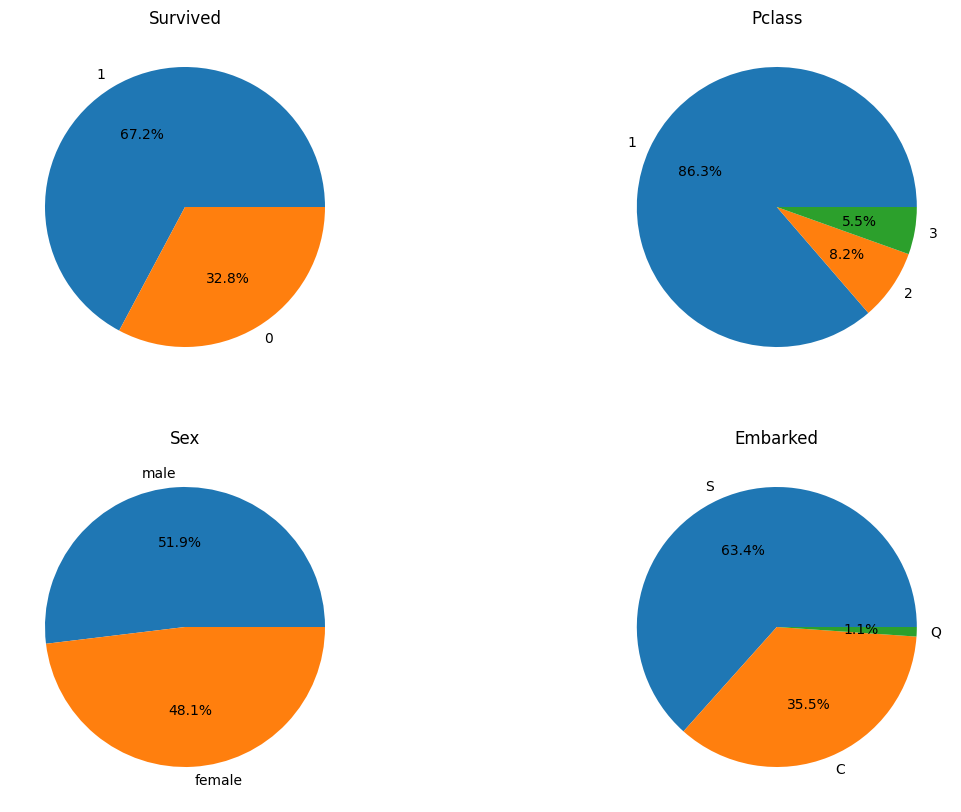

In [89]:
# Dibujar diagramas de tartas de atributos categoricos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(atributos_categoricos):
    value_counts = df[col].value_counts()

    # Agregamos % a cada sector de diagrama de tarta
    axes[i].pie(
        value_counts,
        labels=value_counts.index,
        autopct='%1.1f%%',
    )
    axes[i].set_title(col)

plt.show()

Las diagramas de tartas pueden ser mas faciles para interpretar

In [90]:
# Comprobar si los atributos categoricos estan balanceados
for col in atributos_categoricos:
    print(df[col].value_counts(normalize=True))
    print()

Survived
1    0.672131
0    0.327869
Name: proportion, dtype: float64

Pclass
1    0.863388
2    0.081967
3    0.054645
Name: proportion, dtype: float64

Sex
male      0.519126
female    0.480874
Name: proportion, dtype: float64

Embarked
S    0.633880
C    0.355191
Q    0.010929
Name: proportion, dtype: float64



Despues de hacer una prueba adicional, podemos ver que la mayoria de atributos categoricos no estan balanceados (hay clases que contienen la moyaria absoluta de los datos, mientras tienen menor datos).

### Ejercicio 6:

Para determinar outliers, podemos ver la primera tabla de **Ejercicio 4**, que nos muestra detalles generales de atributos numericos.

Para esto hay que ver distribucion de datos en los rangos interquartiles (IQR), y tambien los valores minimos y maximos.

- Age no tiene outliers significativos;
- SibSp tiene outliers (porque hay pasajeros que viajaban en familias numerosas);
- Parch tiene outliers (indica familias grandes con varios padres o hijos);
- Fare tiene outliers (los precios de billetes son muy distintos);

Otro metodo de ver outliers es dibujar diagramas de cajas y bigotes.

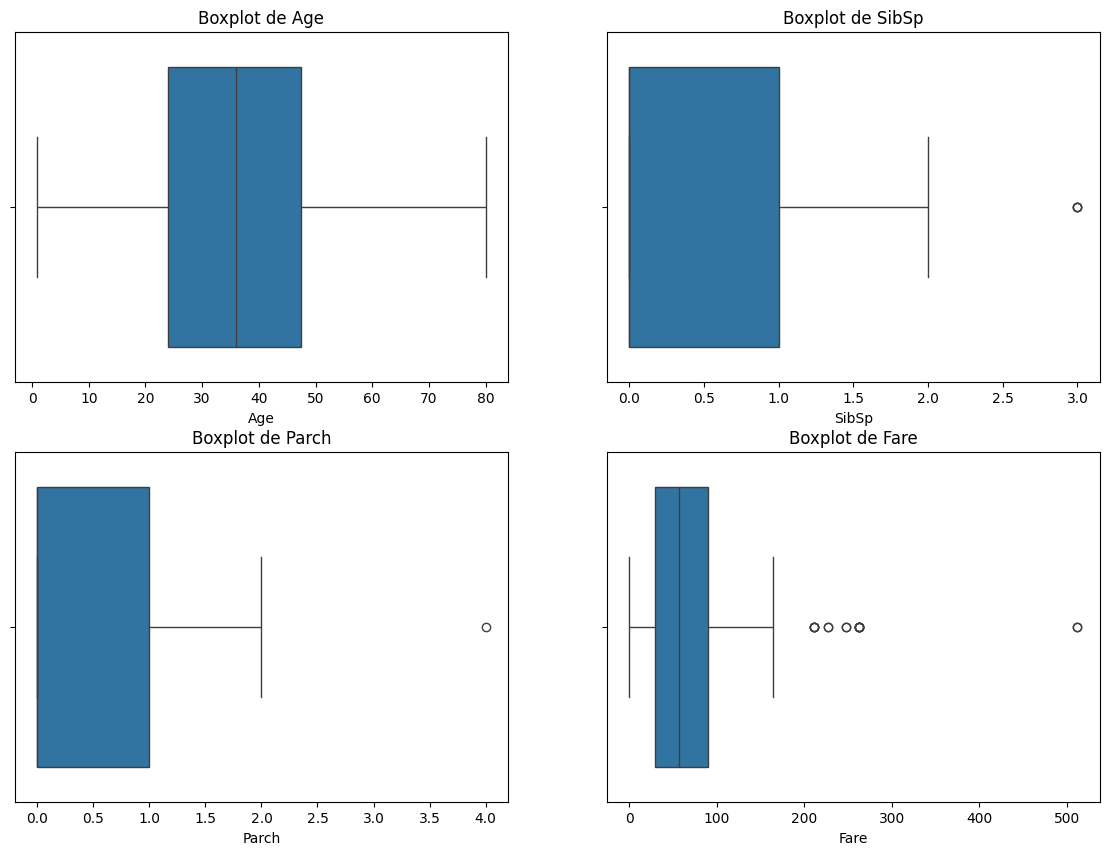

In [92]:
# Dibujar un boxplot (los bigotes - un buen diagrama para ver los outliers) por cada columna numerica
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, col in enumerate(atributos_numericos):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot de {col}')

plt.show()

Al final, podemos ver que hay outliers casi en todas columnas numericas (excepto 'Age')


### Ejercicio 7:

Para convertir los atributos categoricos en valores numericos, utilizamos "get_dummies" con columnas Sex y Embarked

In [93]:
# Convertir atributos categoricos
df_onehot = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
df_onehot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,1,38.0,1,0,71.2833,False,False,False
1,1,1,35.0,1,0,53.1000,False,False,True
2,0,1,54.0,0,0,51.8625,True,False,True
3,1,3,4.0,1,1,16.7000,False,False,True
4,1,1,58.0,0,0,26.5500,False,False,True


Transformamos los atributos Sex y Embarked usando LabelEncoder

In [95]:
# Convertir atributos categoricos usando LabelEncoder
from sklearn.preprocessing import LabelEncoder

df_label_encoded = df.copy()
le = LabelEncoder()
df_label_encoded['Sex'] = le.fit_transform(df['Sex'])
df_label_encoded['Embarked'] = le.fit_transform(df['Embarked'])

df_label_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2


Conclusiones: para atributos ordinales con muchas valores potenciales (e.g. Pclass, Embarked) es mejor usar Label Encoder. One-Hot Encoding es mejor para variables nominales con pocas valores o valores binarias (e.g. Sex).

### Ejercicio 7:

Para normalizacion de datos, utilizamos Normalizer. Los valores resultativos seran en el rango [0, 1].

In [96]:
# Normalizar el dataset
from sklearn.preprocessing import StandardScaler, Normalizer

scaler_norm = Normalizer()
df_normalized = df[atributos_numericos].copy()
df_normalized = pd.DataFrame(scaler_norm.fit_transform(df_normalized), columns=atributos_numericos)
df_normalized.head()

,Age,SibSp,Parch,Fare
0,0.470381,0.012378,0.000000,0.882377
1,0.550270,0.015722,0.000000,0.834839
2,0.721237,0.000000,0.000000,0.692688
3,0.232147,0.058037,0.058037,0.969212
4,0.909263,0.000000,0.000000,0.416223


Para estandartizacion, utilizamos StandardScaler. Los valores resultativos seran en el rango [-1, 1].

In [97]:
# Aplicar estandarizacion (Z-score Scaling)
scaler_std = StandardScaler()
df_standardized = df[atributos_numericos].copy()
df_standardized = pd.DataFrame(scaler_std.fit_transform(df_standardized), columns=atributos_numericos)
df_standardized.head()

,Age,SibSp,Parch,Fare
0,0.149065,0.833628,-0.631730,-0.097180
1,-0.043230,0.833628,-0.631730,-0.335997
2,1.174636,-0.723044,-0.631730,-0.352250
3,-2.030273,0.833628,0.697081,-0.814070
4,1.431029,-0.723044,-0.631730,-0.684702


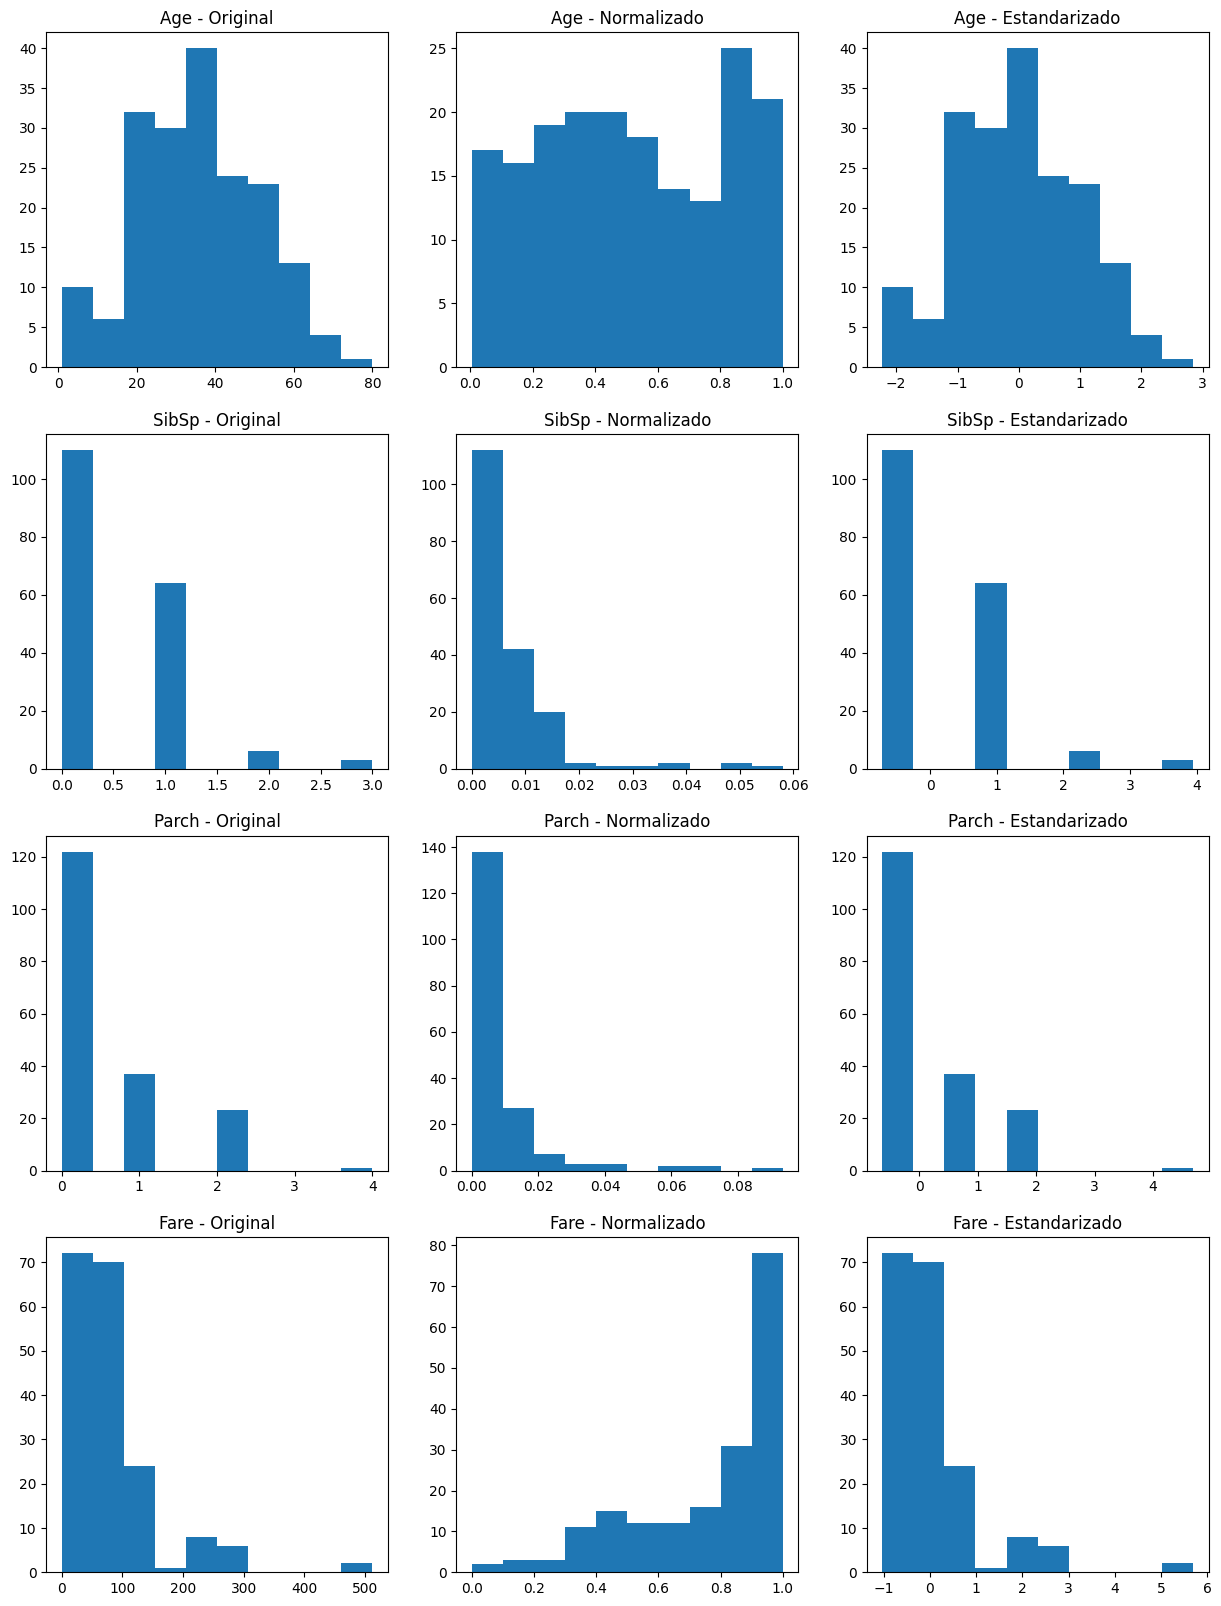

In [98]:
# Dibujar diagramas para comparar resultados de normalizacion y estandartizacion
fig, axes = plt.subplots(len(atributos_numericos), 3, figsize=(15, 5 * len(atributos_numericos)))

for i, col in enumerate(atributos_numericos):
    axes[i, 0].hist(df[col])
    axes[i, 1].hist(df_normalized[col])
    axes[i, 2].hist(df_standardized[col])

    axes[i, 0].set_title(f"{col} - Original")
    axes[i, 1].set_title(f"{col} - Normalizado")
    axes[i, 2].set_title(f"{col} - Estandarizado")

plt.show()

Podemos ver que en caso de normalizacion, la distribucion de datos y al resultado la forma de diagrama cambian, mientras al aplicar la estandartizacion la forma se queda similar a la original.

Conclusion: si hablamos de los use-case de normalizacion y estandartizacion, para algoritmos como Redes Neuronales, normalizacion es mejor porque preserva las relaciones relativas entre los datos. Es que son algoritmos para cuales un rango especifico es mejor.

Para algoritmos lineales como Regresion Logistica o SVM, estandarizacion es mejor porque los datos resultativos tienen media de 0 y una desviación estándar de 1 (son distribuidos normalmente). Tambien es util ahi porque son basados en distancia entre puntos.